# GDP & LIFE EXPECTANCY ANALYSIS

In this project, data on GDP and life expectancy from the World Health Organization is analyzed in order to identify the possible relationship between the GDP and life expectancy of six countries. 

The data includes:
* `Country`: the countries studied (Chile, China, USA, Mexico, Germany, Zimbabwe)
* `Year`: year in which the data was recorded (2000-2015)
* `Life expectancy at birth (years)`
* `GDP`

The data have been obtained from the World Health Organisation and the World Bank. 

## Obgetives of the Analysis:

* Study the variations in life expectancy for each country across time.
* Analyse the evolution of the GDP for each country across time. Observe the differences between developed countries and developing countries.
* For each country, analyse the relationship between life expectancy and GDP. Does the changes in the life expectancy correlated with changes in the countrie's GDP? Does a high GDP indicates a higher life expectancy? 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import ttest_1samp
import statsmodels.api as sm

In [2]:
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# Change names of colunns for easier analysis
data.rename(columns={'Country':'country','Year':'year','Life expectancy at birth (years)':'life_expectancy','GDP':'GDP'},inplace=True)

# Create a variable GDP_billion with the values of GDP converted to billions 
data['GDP_billion'] = data['GDP']/1000000000

# Replace "United States of America" for "USA" to aid future visualizations
data['country'] = data['country'].replace('United States of America', 'USA')
data.head()

,country,year,life_expectancy,GDP,GDP_billion
0,Chile,2000,77.3,7.786093e+10,77.860932
1,Chile,2001,77.3,7.097992e+10,70.979924
2,Chile,2002,77.8,6.973681e+10,69.736811
3,Chile,2003,77.9,7.564346e+10,75.643460
4,Chile,2004,78.0,9.921039e+10,99.210393


In [7]:
# Data types and potential null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
 4   GDP_billion      96 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [9]:
# Observe summary statistcis 
data.describe(include='all')

,country,year,life_expectancy,GDP,GDP_billion
count,96,96.000000,96.000000,9.600000e+01,96.000000
unique,6,NaN,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12,3880.498571
std,NaN,4.633971,10.672882,5.197561e+12,5197.561311
min,NaN,2000.000000,44.300000,4.415703e+09,4.415703
25%,NaN,2003.750000,74.475000,1.733018e+11,173.301750
50%,NaN,2007.500000,76.750000,1.280220e+12,1280.220000
75%,NaN,2011.250000,78.900000,4.067510e+12,4067.510000


In [11]:
# What countries are included in the study?
data.country.value_counts()

country
Chile       16
China       16
Germany     16
Mexico      16
USA         16
Zimbabwe    16
Name: count, dtype: int64

### Dataset examination

The dtypes of the variables included in the dataset are as expected and there seem to be no missing data or null values. The six countries included in the dataset are: Chile, China, Germany, Mexico, United States of America, and Zimbabwe. There are 16 observations for each country, containing the values of life expectancy and GDP every year from 2000 to 2015. 

From the summary statistics, there seems to be a high contrasts between the maximum and minimum values for life expectancy and GDP. In fact, the minimum values for both variables is considerably far from the central distribution. Further exploration of the data should offer more information about this discrepancy. 

## 1. Variations in Life Expectancy across Time and Country

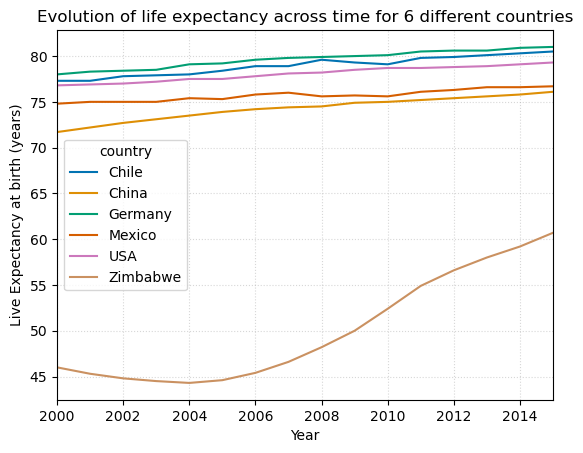

In [15]:
# Analysis of Life expectancy by year and country
sns.lineplot(data=data, x='year', y='life_expectancy', hue='country', markers=True, palette='colorblind')
plt.ylabel('Live Expectancy at birth (years)')
plt.xlabel('Year')
plt.title('Evolution of life expectancy across time for 6 different countries')
plt.xlim(left=2000,right=2015)
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\2567627853.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='country', y='life_expectancy', palette='pastel')


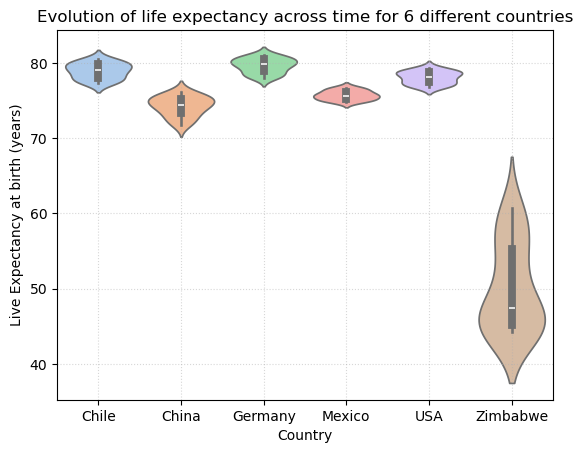

In [17]:
sns.violinplot(data=data, x='country', y='life_expectancy', palette='pastel')
plt.ylabel('Live Expectancy at birth (years)')
plt.xlabel('Country')
plt.title('Evolution of life expectancy across time for 6 different countries')

plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

In [19]:
# Calculation of the overal increase in life expectancy per country
increase_list = []
for country in data.country.unique():
    country_data = data[data.country == country]
    
    # Calculate life expectancy at the beginning of the period under study
    LE_start = country_data.life_expectancy[country_data.year == 2000].values
  
    # Calculate life expectancy at the end of the period under study
    LE_end = country_data.life_expectancy[country_data.year == 2015].values

    # Check if LE_start and LE_end have values to avoid indexing errors
    if len(LE_start) > 0 and len(LE_end) > 0:
        increase = LE_end[0] - LE_start[0]  # Calculate the increase
        increase_list.append([country,increase])
        print(f"The overall increase in life expectancy for {country} is: {increase:.2f}")
    else:
        print(f"Data missing for {country} in 2000 or 2015")


The overall increase in life expectancy for Chile is: 3.20
The overall increase in life expectancy for China is: 4.40
The overall increase in life expectancy for Germany is: 3.00
The overall increase in life expectancy for Mexico is: 1.90
The overall increase in life expectancy for USA is: 2.50
The overall increase in life expectancy for Zimbabwe is: 14.70


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\3671487324.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_increaseLE, x='country', y='LE_increase', palette='pastel', edgecolor='gray')


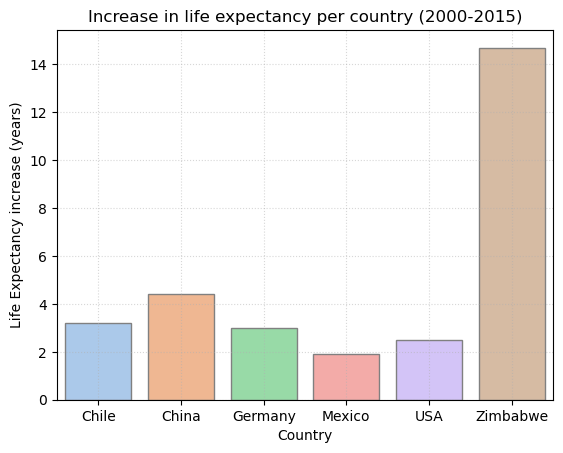

In [21]:
# Create a dataframe with the name of the countries and the increase in life expectancy 
df_increaseLE = pd.DataFrame(increase_list, columns=['country', 'LE_increase'])
# Plot the increase LE per country in a bar plot
sns.barplot(df_increaseLE, x='country', y='LE_increase', palette='pastel', edgecolor='gray')
plt.title('Increase in life expectancy per country (2000-2015)')
plt.xlabel('Country')
plt.ylabel('Life Expectancy increase (years)')
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

### Life Expectancy increases over time in the 6 countries under study

All of the countries included in the analysis show an increase in life expectancy over time. Germany shows a higher life expectancy overal across time with respect to the other 5 countries, followed closely by Chile. The lowest observed life expectancy is from Zimbabwe. However, Zimbabwe experiences a sharp increase in life expectancy between 2006 and 2015 from just avobe 45 years of life expectancy to over 60 years. This represents an increase in life expectancy of 14.7 years, which is in contrast with the less than 5 years increase of the other 5 countries included in the analysis. The lowest increase in life expectancy during the period from 2000 to 2015 was produced by Mexico, with an increase of only 1.9 years. 

In addition, the low intial life expectancy for Zimbabwe (~45 years of age) also explains why the minimum values of the life expectancy variable in the dataset were so different from the central distribution. Interestignly, although Chile is generally considered a developing country, it seems to have a life expectancy comparable to the life expectancy in Germany or even superior to the life expectancy in the USA. 

## 2. Evolution of the GDP for each Country across Time

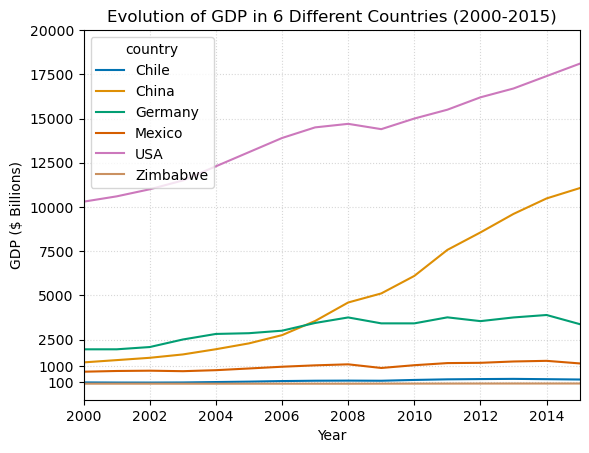

In [25]:
# Analysis of GDP by year and country
ax = plt.subplot()
sns.lineplot(data=data, x='year', y='GDP_billion', hue='country', markers=True, palette='colorblind')
plt.ylabel('GDP ($ Billions)')
plt.xlabel('Year')
plt.title('Evolution of GDP in 6 Different Countries (2000-2015)')
plt.xlim(left=2000,right=2015)
ax.set_yticks([100, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

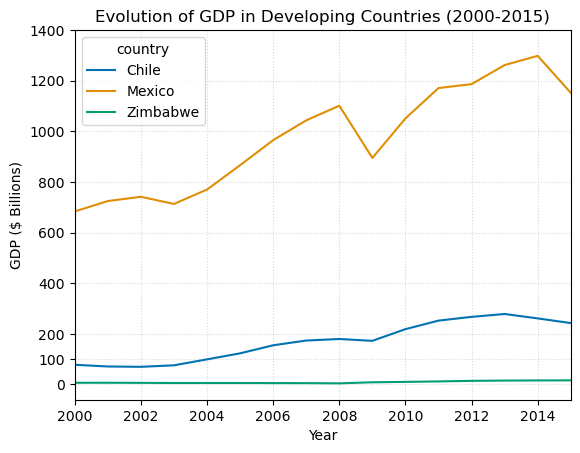

In [27]:
data_lowGDP2 = data[(data.country != 'China') & (data.country != 'Germany') & (data.country != 'USA')]

ax = plt.subplot()
sns.lineplot(data=data_lowGDP2, x='year', y='GDP_billion', hue='country', markers=True, palette='colorblind')
plt.ylabel('GDP ($ Billions)')
plt.xlabel('Year')
plt.title('Evolution of GDP in Developing Countries (2000-2015)')
plt.xlim(left=2000,right=2015)
ax.set_yticks([0, 100, 200, 400, 600, 800, 1000, 1200, 1400])
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

### GDP Increases Over Time in the 6 Countries Under Study

Regarding the GDP, the data shows a condiderable gap between developed and developing countries. The developing countries included in this analysis (Mexico, Chile, and Zimbabwe) present a GDP between 70 Billion and 700 Billion USD at the beggining of the analysis (2000). The largest GDP increase in the group of developing countries is produced by Mexico, with 468.61 billions USD increase by 2015. In contrast, Chile and Zimbabwe experience a rather modest increase in GDP with 164.66 billions USD and 9.61 billions USD, respectively. 

The developed countries included in the analysis (USA, China, and Germany) showcase a starting GDP (2000) between 1000 billion USD and 10000 billion USD. The highest GDP at all time points is produced by USA. However, the largest GDP increase in the group of developed countries is given by China, with 9853.35 billions USD. The GDP increases for USA and Germany by the end of the period under study are 7800.00 billions USD and 1425.66 billions USD, respectively. It should be noted that both the initial GDP and the GDP increase by 2015 are considerably larger for the group of developed countries when compare to the developing countries. Hypothesis testing considering the average GDP of developing countries and the average GDP of developed countries reavealed a statistical significance with a p-value<0.001.

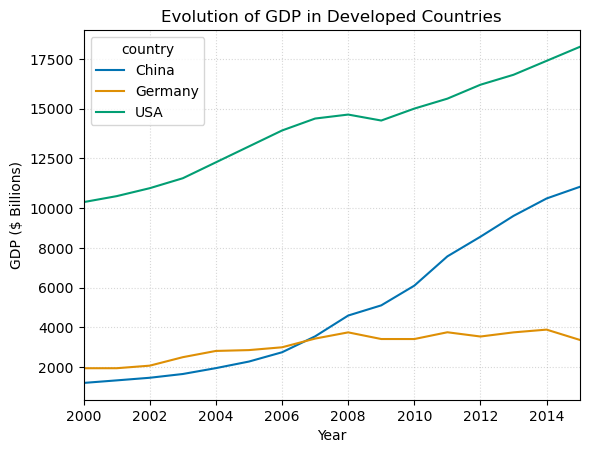

In [30]:
# GDP graph by country excluding USA, China, and Germany to be able to evaluate differences in lower income countries
data_highGDP2 = data[(data.country == 'China') | (data.country == 'Germany') | (data.country == 'USA')]

ax = plt.subplot()
sns.lineplot(data=data_highGDP2, x='year', y='GDP_billion', hue='country', markers='o', palette='colorblind')
plt.ylabel('GDP ($ Billions)')
plt.xlabel('Year')
plt.title('Evolution of GDP in Developed Countries')
plt.xlim(left=2000,right=2015)
ax.set_yticks([2000, 4000, 6000, 8000, 10000, 12500, 15000, 17500])
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

In [32]:
# Calculation of the overal increases in GDP by country
increase_GDP = []
for country in data.country.unique():
    country_data = data[data.country == country]
    
    # Calculate GDP at the beginning of the period under study
    GDP_start = country_data.GDP_billion[country_data.year == 2000].values
  
    # Calculate GDP at the end of the period under study
    GDP_end = country_data.GDP_billion[country_data.year == 2015].values

    # Check if LE_start and LE_end have values to avoid indexing errors
    if len(GDP_start) > 0 and len(GDP_end) > 0:
        increase = GDP_end[0] - GDP_start[0]  # Calculate the increase
        increase_GDP.append(increase)
        print(f"The overall increase in GDP for {country} is: {increase:.2f} $ billions.")
    else:
        print(f"Data missing for {country} in 2000 or 2015")

# Add a column with the GDP increases to the dataframe df_increaseLE
df_increaseLE['GDP_increase']= pd.Series(increase_GDP)

df_increaseLE

The overall increase in GDP for Chile is: 164.66 $ billions.
The overall increase in GDP for China is: 9853.35 $ billions.
The overall increase in GDP for Germany is: 1425.66 $ billions.
The overall increase in GDP for Mexico is: 468.61 $ billions.
The overall increase in GDP for USA is: 7800.00 $ billions.
The overall increase in GDP for Zimbabwe is: 9.61 $ billions.


,country,LE_increase,GDP_increase
0,Chile,3.2,164.657068
1,China,4.4,9853.350000
2,Germany,3.0,1425.660000
3,Mexico,1.9,468.612000
4,USA,2.5,7800.000000
5,Zimbabwe,14.7,9.614710


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\2894653409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_increaseLE, x='country', y='GDP_increase', palette='pastel', edgecolor='gray')


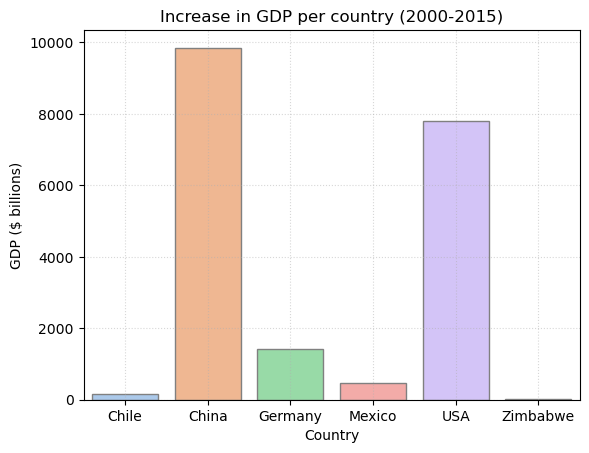

In [34]:
# Plot the increase LE per country in a bar plot
sns.barplot(df_increaseLE, x='country', y='GDP_increase', palette='pastel', edgecolor='gray')
plt.title('Increase in GDP per country (2000-2015)')
plt.xlabel('Country')
plt.ylabel('GDP ($ billions)')
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\3541199472.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(df_increaseLE, x='country', y='GDP_increase', palette='pastel', edgecolor='gray', ax=ax1)
C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\3541199472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(df_increaseLE, x='country', y='GDP_increase', palette='pastel', edgecolor='gray', ax=ax2)


Text(0.5, 0, 'Country')

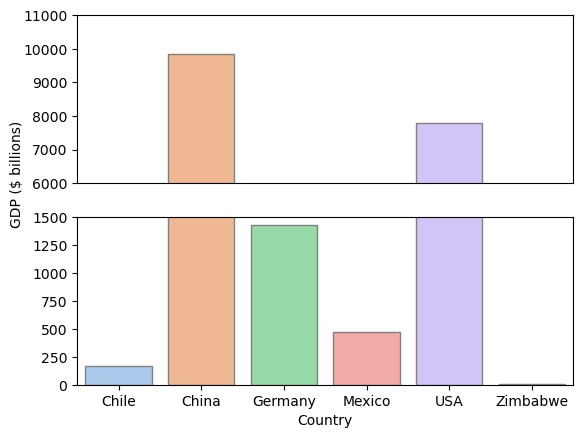

In [36]:
# Construct the bar plot from avobe with a break in the middle (betweem 2000 and 6000)
# Two plots are created ax1 (avobe the cutoff) and ax2 (bellow the cuttoff)

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
ax1 = sns.barplot(df_increaseLE, x='country', y='GDP_increase', palette='pastel', edgecolor='gray', ax=ax1)
ax2 = sns.barplot(df_increaseLE, x='country', y='GDP_increase', palette='pastel', edgecolor='gray', ax=ax2)

# Set limits of individual y axis: upper part (ax1) shows values from 6000 to 12000, lower part (ax2) shows values from 0 to 1500
ax1.set_ylim(6000, 11000)
ax2.set_ylim(0,1500)

# Errase the x-axis of the upper part as it will be shared with the lower part
ax1.get_xaxis().set_visible(False)

# Set a common y-label
ax1.set_ylabel("")
ax2.set_ylabel("")
f.text(0.02,0.55, "GDP ($ billions)", va="center", rotation='vertical')


# Set a common legend
#ax1.get_legend().remove()
#ax2.get_legend().remove()
#ax2.legend(loc=(1.025,0.5), title='Countries')


plt.xlabel('Country')

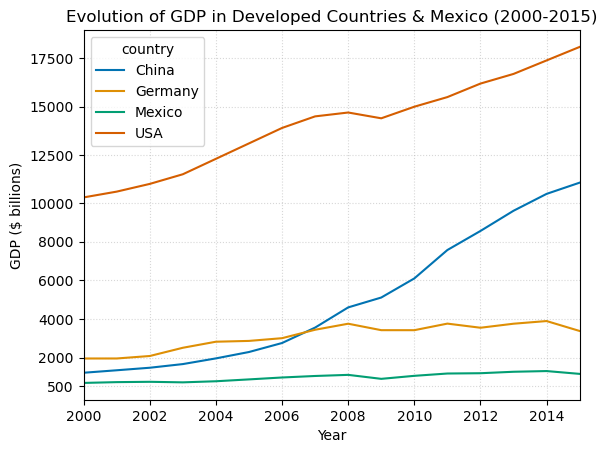

In [38]:
# GDP graph by country excluding USA, China, and Germany to be able to evaluate differences in lower income countries
data_highGDP = data[(data.country == 'China') | (data.country == 'Germany') | (data.country == 'USA') | (data.country == 'Mexico')]

ax = plt.subplot()
sns.lineplot(data=data_highGDP, x='year', y='GDP_billion', hue='country', markers='o', palette='colorblind')
plt.ylabel('GDP ($ billions)')
plt.xlabel('Year')
plt.title('Evolution of GDP in Developed Countries & Mexico (2000-2015)')
plt.xlim(left=2000,right=2015)
ax.set_yticks([500, 2000, 4000, 6000, 8000, 10000, 12500, 15000, 17500])
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

In [40]:
# Function to categorize the countries in the dataframe as developed or developing
def categorize_country(country):
    if country in ['USA','Germany','China']:
        return 'Developed'
    else:
        return 'Developing'

# Create a new column in the dataframe with the developing status
data['developing_status'] = data['country'].apply(categorize_country)

data.head()

,country,year,life_expectancy,GDP,GDP_billion,developing_status
0,Chile,2000,77.3,7.786093e+10,77.860932,Developing
1,Chile,2001,77.3,7.097992e+10,70.979924,Developing
2,Chile,2002,77.8,6.973681e+10,69.736811,Developing
3,Chile,2003,77.9,7.564346e+10,75.643460,Developing
4,Chile,2004,78.0,9.921039e+10,99.210393,Developing


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\3544873833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='developing_status', y='GDP_billion', data=data, palette='winter')


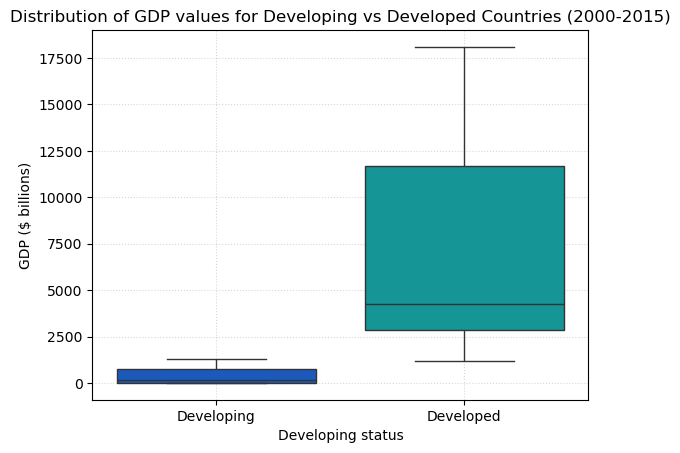

In [52]:
# Boxplot of GDP in developing vs developed countries
sns.boxplot(x='developing_status', y='GDP_billion', data=data, palette='winter')
plt.ylabel('GDP ($ billions)')
plt.xlabel('Developing status')
plt.title('Distribution of GDP values for Developing vs Developed Countries (2000-2015)')
plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')

In [58]:
# Is the difference between the average GDP of developing countries and the average GDP of developed countries statistically significant?
sample_distribution = data_lowGDP2.GDP_billion
expected_mean = np.mean(data_highGDP2.GDP_billion)
ttest, pval = ttest_1samp(sample_distribution, expected_mean)

print(f"t-test: {ttest}")
print(f"p-value: {pval}")

t-test: -108.5830710221193
p-value: 4.337969334173469e-58


## 3. Analysis the Relationship between Life Expectancy and GDP by Country.

The increase in life expectancy seems to be correlated with increases in GDP in a positive manner for all the contries under study. However, the GDP-induced increase in life expectancy appears more dramatic in developing countries. As an example, a GDP increase in 10 billion USD produces an increase in life expectancy of 0.13 years and 13.35 years for Chile and Zimbabwe, respectively. Whereas the same GDP increase only cause an increase in life expectancy of 0.0034 years and 0.028 years for USA and Germany, respectively. Therefore, the life expectancy in low income countries can be improve by increasing the GDP of the countries. However, once the countries reach a certain lebel of economically-driven well-being, the effects of GDP on life expectancy are reduced. 

Lastly, in the case of China, the relationship between life expectancy and GDP seems to follow a exponential relationship rather than linear. The country experiences a sharp increase in life expectancy from ~71.5 to ~74.5 until it reaches a GDP of 4000 billion USD and smother increase after that. For this reason, the slope obtained in the linear regression model for China should be taken with caution. China's exponential relationship between life expectancy and GDP could also reflect the importance of higher GDP in a developmental stage of the country and a lower relevance once the country has reached a certain whealthy level. 

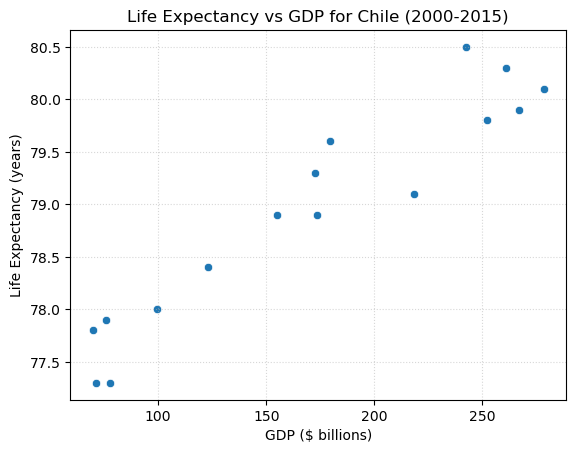

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\1338278483.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linreg_list.append([country,results.params[0],results.params[1]])


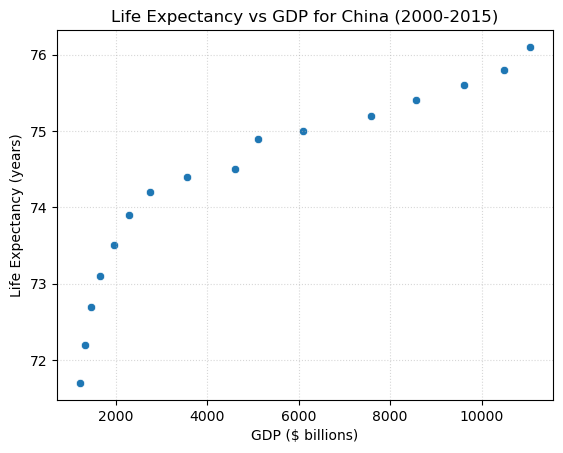

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\1338278483.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linreg_list.append([country,results.params[0],results.params[1]])


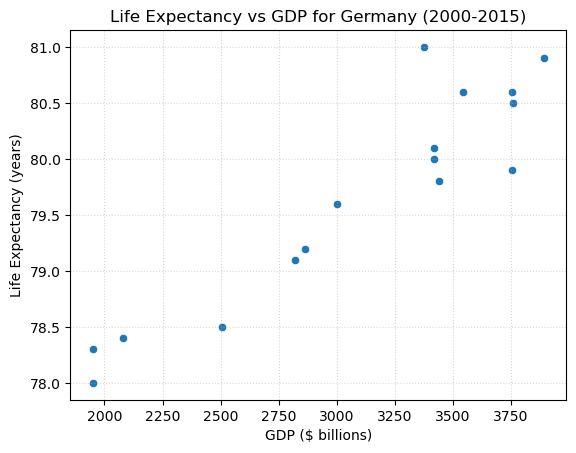

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\1338278483.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linreg_list.append([country,results.params[0],results.params[1]])


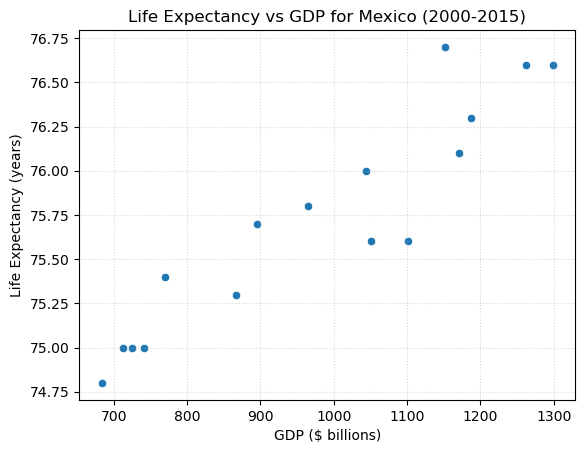

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\1338278483.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linreg_list.append([country,results.params[0],results.params[1]])


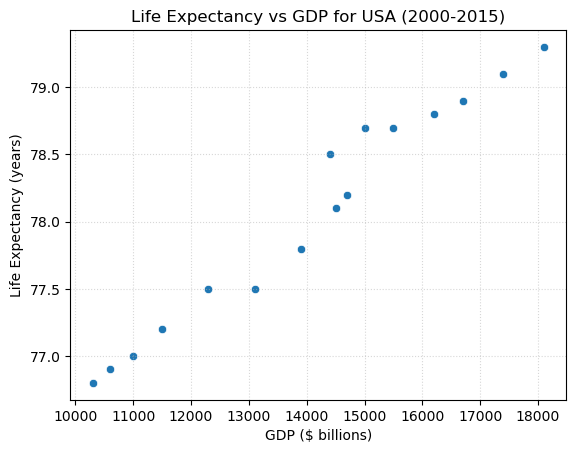

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\1338278483.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linreg_list.append([country,results.params[0],results.params[1]])


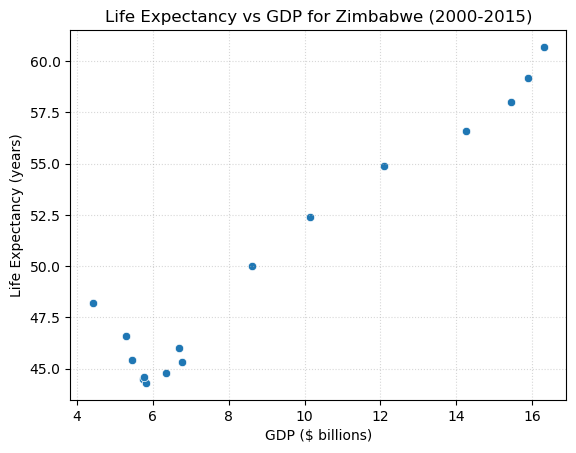

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_17196\1338278483.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linreg_list.append([country,results.params[0],results.params[1]])


<Figure size 640x480 with 0 Axes>

In [80]:
# Empty list to store linear Regression paramiters
linreg_list = []

# Loop through the countrie's data and create a scatterplot of Life expectancy vs GDP
for country in data.country.unique():
    country_data = data[data.country == country]

    # Create a plot for every country
    ax = plt.subplot()
    sns.scatterplot(x='GDP_billion', y='life_expectancy', data=country_data)
    ax.set_title(f"Life Expectancy vs GDP for {country} (2000-2015)")
    plt.xlabel("GDP ($ billions)")
    plt.ylabel("Life Expectancy (years)")
    plt.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle=':')
    plt.show()
    plt.clf()

    # Linear Regression Model
    model = sm.OLS.from_formula('life_expectancy~GDP_billion',data=country_data)
    results = model.fit()
    linreg_list.append([country,results.params[0],results.params[1]])
    

In [81]:
# Create a dataframe with the parameters of the linear regression for each country
linreg_param = pd.DataFrame(linreg_list, columns=['country', 'intercept','slope'])
linreg_param

,country,intercept,slope
0,Chile,76.722339,0.013083
1,China,72.566853,0.000342
2,Germany,75.439936,0.001362
3,Mexico,73.020911,0.002762
4,USA,73.333573,0.000336
5,Zimbabwe,37.992498,1.335299
